<a href="https://colab.research.google.com/github/FandiAR/py_datax/blob/main/Python_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# data type
integer = 3
boolean = True
float_ = 3.5
string = 'Fandi'

In [9]:
print('tipe data di variable integer adalah', type(integer))
print(type(boolean))

tipe data di variable integer adalah <class 'int'>
<class 'bool'>


In [10]:
if boolean:
  print('boolean adalah true')
else:
  print('boolean adalah false')

boolean adalah true


In [22]:
float_*3

10.5

In [35]:
def salam(nama):
  return f'''Selamat pagi {nama}


  '''

In [39]:
salam(string)

'Selamat pagi Fandi\n\n  \n  '

In [41]:
def greeting(nama):
  return f"Selamat pagi {nama}"

greeting(string)

'Selamat pagi Fandi'

In [42]:
# data manipulation
import pandas as pd
df = pd.DataFrame({'col1': [1,2,'angka'], 'col2': [3,4,3.7]})
print(df)

    col1  col2
0      1   3.0
1      2   4.0
2  angka   3.7


In [44]:
df.dtypes

,0
col1,object
col2,float64


In [45]:
# mau ubah tipe data, tapi nggak bisa langsung, jadi ubah value nya dulu
# mengubah value dari col1, indexk ke 2, dari "angka" menjadi integer 3
df['col1'][2] = 3

/tmp/ipython-input-1945558886.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['col1'][2] = 3
/tmp/ipython-input-1945558886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

In [46]:
df

,col1,col2
0,1,3.0
1,2,4.0
2,3,3.7


In [47]:
# mau ubah tipe data, tapi nggak bisa langsung, jadi ubah value nya dulu
# mengubah value dari col2, index ke 2, dari float 3.7 menjadi integer 4
df['col2'][2] = 4

/tmp/ipython-input-734179516.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['col2'][2] = 4
/tmp/ipython-input-734179516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

In [48]:
for col in df.columns:
  # ubah tipe data jadi integer semua
  df[col] = df[col].astype(int)

In [49]:
df.dtypes

,0
col1,int64
col2,int64


In [51]:
df['col2'].min()

3

In [52]:
df['col2'].max()

4

In [54]:
df['col3'] = df['col1'] * df['col2'].min()
df

,col1,col2,col3
0,1,3,3
1,2,4,6
2,3,4,9


In [56]:
df['col4'] = df['col2'] * df['col2'].max()
df

,col1,col2,col3,col4
0,1,3,3,12
1,2,4,6,16
2,3,4,9,16


In [59]:
df1 = pd.DataFrame({'nama awal': ['A', 'B', 'C', 'B', None, 'D'], 'nama akhir': ['Z','X','Y','O',None,'R']})

# Gabungan nama
df1['gabungan nama'] = df1['nama awal'] + ' ' + df1['nama akhir'].astype('str')
df1

,nama awal,nama akhir,gabungan nama
0,A,Z,A Z
1,B,X,B X
2,C,Y,C Y
3,B,O,B O
4,None,None,NaN
5,D,R,D R


In [61]:
# isi value kosong pada table df1
# df1['nama awal'] = df1['nama awal'].fillna('kosong')
# df1

,nama awal,nama akhir,gabungan nama
0,A,Z,A Z
1,B,X,B X
2,C,Y,C Y
3,B,O,B O
4,kosong,None,NaN
5,D,R,D R


In [77]:
# menjadikan fillna sebagai function, jadi klo ada data yg kosong, bisa langsung di replace dengan value default dari function ini
# disini contohnya nilai defaultnya adalah <NULL> empty string (None) dan -1 untuk empty int atau flot (NaN)
def processing_fillna(df, col):
    if col == 'col1':
      df[col] = df[col].fillna(df[col].median())
    elif df[col].dtype == 'object':
      df[col] = df[col].fillna('<NULL>')
      # sama dengan kayak gini df[col].fillna('<NULL>', inplace=True)
    else:
      df[col] = df[col].fillna(-1)
    return df

In [78]:
for col in df1.columns:
  processing_fillna(df1, col)

In [76]:
df1

,nama awal,nama akhir,gabungan nama
0,A,Z,A Z
1,B,X,B X
2,C,Y,C Y
3,B,O,B O
4,kosong,None,NaN
5,D,R,D R


In [80]:
# langsung hapus duplikat data
df1.drop_duplicates()

,nama awal,nama akhir,gabungan nama
0,A,Z,A Z
1,B,X,B X
2,C,Y,C Y
3,B,O,B O
4,kosong,<NULL>,<NULL>
5,D,R,D R


In [81]:
# klo mau check dulu ada duplicate atau nggak, baru hapus
df1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False


In [96]:
# hapus kolom (misalkan karena terlalu banyak nilai kosong) tapi pakai copy agar tanpa hapus data aslinya
df2 = df1.copy().drop(columns = ['gabungan nama'])
df2

,nama awal,nama akhir
0,A,Z
1,B,X
2,C,Y
3,B,O
4,kosong,<NULL>
5,D,R


In [97]:
# mengubah value dengan mapping dalam 1 kolom
mapping_nama_awal = {'A': 'Ani', 'B': 'Budi', 'C': 'Cici', 'D': 'Dani' }
df2['nama awal'] = df2['nama awal'].map(mapping_nama_awal)
df2

,nama awal,nama akhir
0,Ani,Z
1,Budi,X
2,Cici,Y
3,Budi,O
4,NaN,<NULL>
5,Dani,R


In [98]:
# cari data yg unique
df2['nama akhir'].unique()

array(['Z', 'X', 'Y', 'O', '<NULL>', 'R'], dtype=object)

In [99]:
# hitung jumlah nilai unique
df2['nama akhir'].nunique()

6

In [100]:
# mengubah value dengan mapping dalam 1 kolom
mapping_nama_akhir = {'Z': 'Zaky', 'X': 'Xena', 'Y': 'Yanti', 'O': 'Oky', 'R': 'Randy', '<NULL>':'<NULL>' }
df2['nama akhir'] = df2['nama akhir'].map(mapping_nama_akhir)
df2

,nama awal,nama akhir
0,Ani,Zaky
1,Budi,Xena
2,Cici,Yanti
3,Budi,Oky
4,NaN,<NULL>
5,Dani,Randy


In [101]:
# mengganti nama column
df2.rename(columns = {'nama awal': 'nama_awal', 'nama akhir': 'nama_akhir'}, inplace=True)
df2

,nama_awal,nama_akhir
0,Ani,Zaky
1,Budi,Xena
2,Cici,Yanti
3,Budi,Oky
4,NaN,<NULL>
5,Dani,Randy


In [102]:
# buat datarame baru buat kardinalitas
df3 = pd.DataFrame({'kategori': ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'C', 'D', 'D', 'D', 'D', 'D', 'E', 'E','E','E','E','E','E']})
df3

,kategori
0,A
1,A
2,A
3,A
4,A
5,A
6,B
7,B
8,C
9,D


In [113]:
# cek kardinalitas = jumlah masing-masing value di data frame dengan menggunakan value_counts
proporsi  = df3['kategori'].value_counts(normalize=True)
proporsi
# proporsi[proporsi >= 0.1].index

,proportion
kategori,
E,0.333333
A,0.285714
D,0.238095
B,0.095238
C,0.047619


In [114]:
# gabungkan kategori yang < 0.1
df3['kategori'] = df3['kategori'].where(df3['kategori'].isin(proporsi[proporsi >= 0.1].index), 'lainnya')
df3

,kategori
0,A
1,A
2,A
3,A
4,A
5,A
6,lainnya
7,lainnya
8,lainnya
9,D


In [124]:
import pandas as pd
df = pd.read_csv('/content/sample_data/dm_office_sales.csv')
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [125]:
# lihat informasi lengkap table/dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [122]:
# hitung jumlah rows dan columns
df.shape

(1000, 6)

In [123]:
# hitung jumlah rows
df.shape[0]

1000

In [128]:
# statistik dasar
# mean = nilai rata-rata
# median = 50%
df.describe()

,training level,work experience,salary,sales
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,1.262000,6.14200,90264.207000,339833.846000
std,0.925317,2.94797,17398.617174,108555.773316
min,0.000000,0.00000,41660.000000,53067.000000
25%,1.000000,4.00000,77584.000000,259257.500000
50%,1.000000,6.00000,89946.000000,338145.500000
75%,2.000000,8.00000,101834.250000,415210.250000
max,3.000000,16.00000,159148.000000,761477.000000


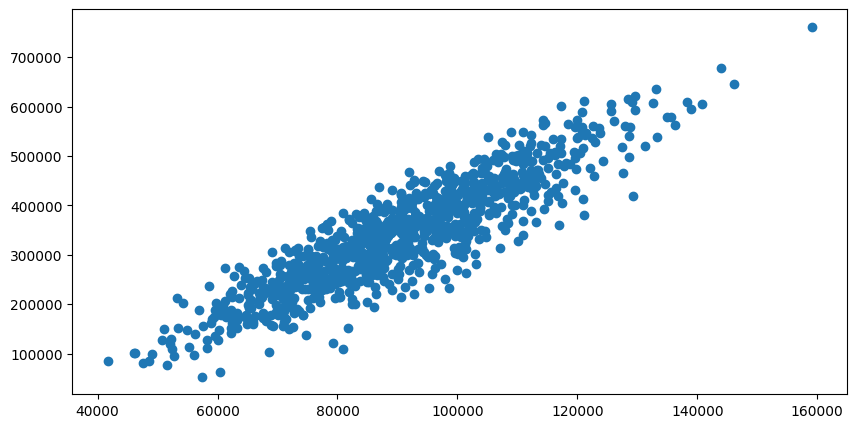

In [129]:
# scatterplot menggunakan matplotlib
import matplotlib.pyplot as plt

# biasanya matplot cuma buat figure, karena tampilan di web masih jelek
plt.figure(figsize=[10, 5])
plt.scatter(df['salary'], df['sales'])

<Axes: xlabel='salary', ylabel='sales'>

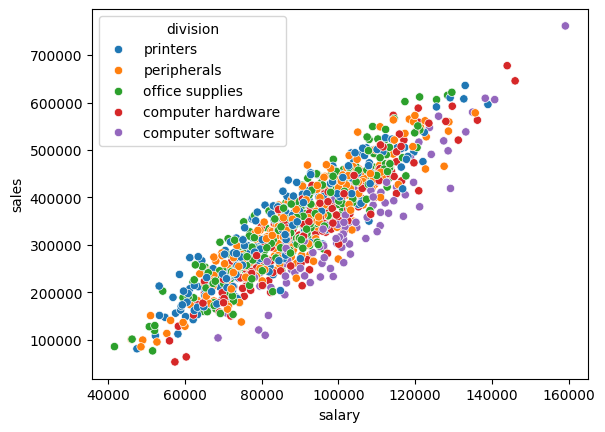

In [131]:
# scatterplot menggunakan lib seaborn
import seaborn as sns
sns.scatterplot(x='salary', y='sales', data=df, hue='division')

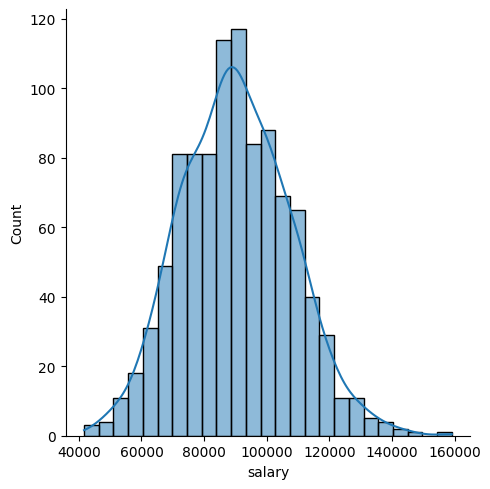

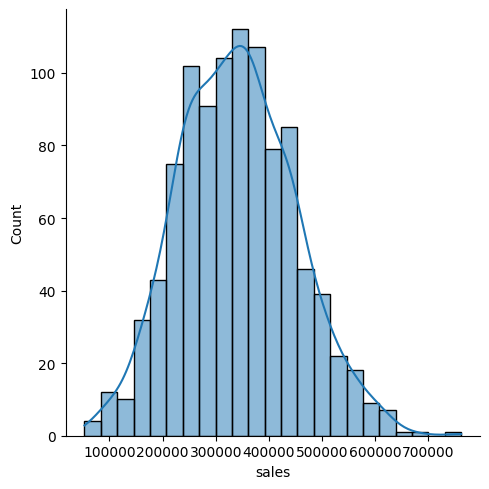

In [137]:
# distribusi plot (displot)
sns.displot(df['salary'], kde=True)
sns.displot(df['sales'], kde=True)

<Axes: xlabel='salary', ylabel='Count'>

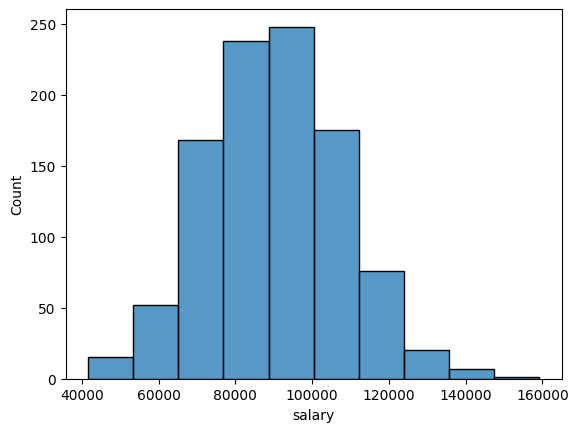

In [142]:
# distribusi menggunakan histogram plot (hispot)
sns.histplot(df['salary'], bins=10)
# sns.histplot(df['sales'])

<Axes: xlabel='count', ylabel='division'>

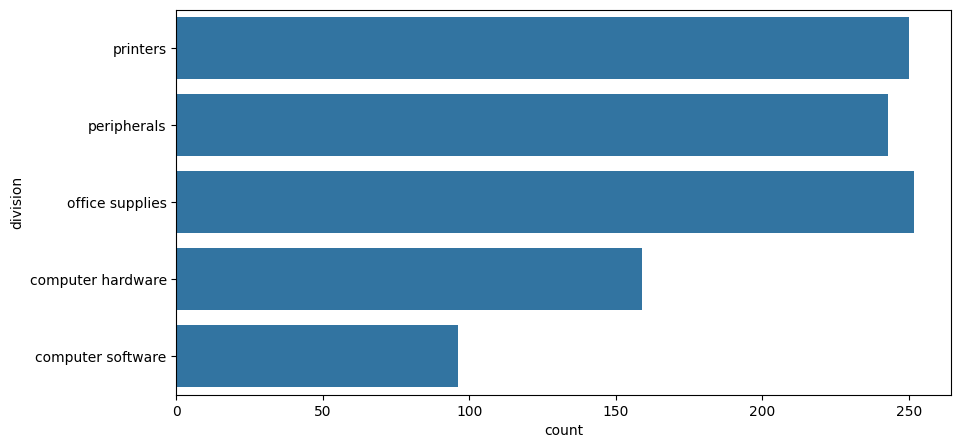

In [145]:
# distribusi plot categorical column by division
plt.figure(figsize=(10,5))
sns.countplot(df['division'])

<Axes: xlabel='count', ylabel='level of education'>

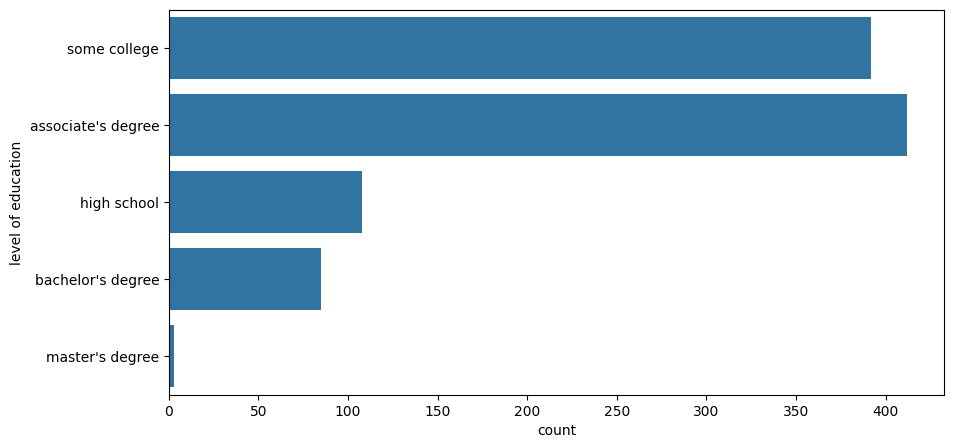

In [147]:
# distribusi plot categorical column by level of education
plt.figure(figsize=(10,5))
sns.countplot(df['level of education'])

<Axes: xlabel='level of education', ylabel='count'>

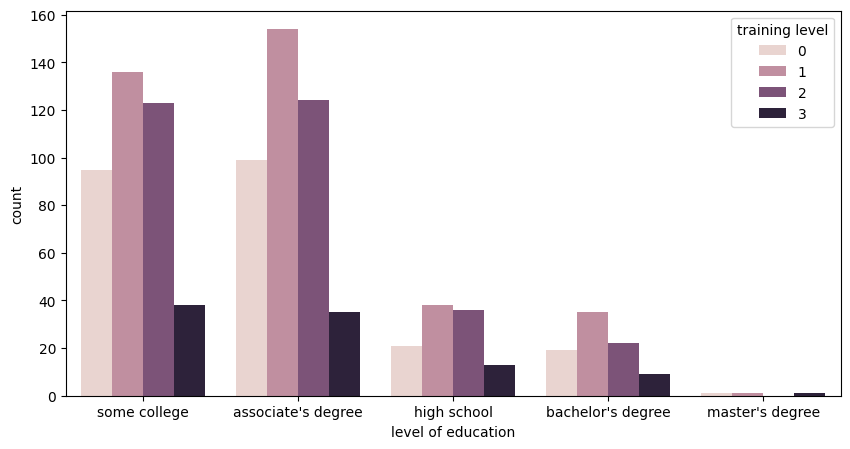

In [149]:
# distribusi plot categorical column by level of education with training level
plt.figure(figsize=(10,5))
sns.countplot(x = 'level of education', hue = 'training level', data = df)

In [154]:
# filter data by key
df[(df['division'].isin(['printers', 'office supplies']) & df['level of education'].isin(["associate's degree"]))]

,division,level of education,training level,work experience,salary,sales
1,printers,associate's degree,2,10,119679,495660
3,office supplies,associate's degree,2,5,92949,377148
8,printers,associate's degree,3,2,72844,308443
10,printers,associate's degree,2,3,73508,251044
15,printers,associate's degree,2,7,105864,427161
...,...,...,...,...,...,...
955,office supplies,associate's degree,1,4,77455,228234
966,office supplies,associate's degree,0,7,90349,310658
973,printers,associate's degree,0,8,86134,321336
976,office supplies,associate's degree,1,7,96361,339365


In [161]:
# jumlah divisi yang ada dan jumlah data terdaftar di setiap divisi
df_division = df['division'].value_counts().reset_index().rename(columns = {'count': 'jumlah', 'division': 'divisi'})
df_division

,divisi,jumlah
0,office supplies,252
1,printers,250
2,peripherals,243
3,computer hardware,159
4,computer software,96


In [166]:
# export to csv, dan hapus column index
df_division.to_csv('df_division.csv', index = False)

In [169]:
# jumlah divisi yang ada dan jumlah data terdaftar di setiap level of education
df_education = df['level of education'].value_counts().reset_index().rename(columns = {'count': 'jumlah', 'level of education': 'level edukasi'})
df_education

,level edukasi,jumlah
0,associate's degree,412
1,some college,392
2,high school,108
3,bachelor's degree,85
4,master's degree,3


<Axes: xlabel='level edukasi', ylabel='jumlah'>

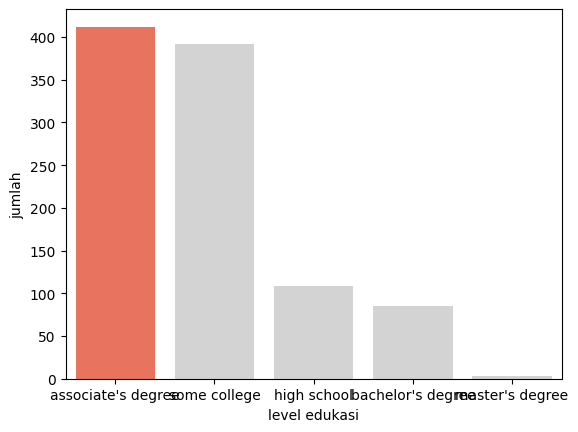

In [193]:
# bar chart with custom style
color = ['tomato' if k == df_education['level edukasi'][0] else 'lightgray' for k in df_education['level edukasi'].unique().tolist()]
barplotX = sns.barplot(
    data=df_education,
    x='level edukasi',
    y='jumlah',
    hue='level edukasi',
    palette=color,
    legend=False
)
barplotX

<Axes: xlabel='level of education', ylabel='sales'>

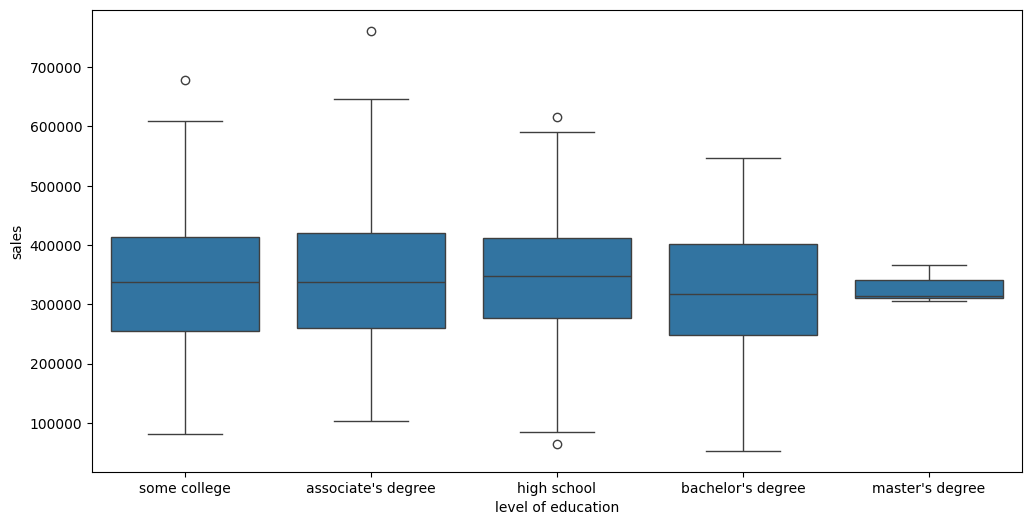

In [196]:
# boxplot with seaborn
plt.figure(figsize=(12, 6))
boxplotX = sns.boxplot(df, x='level of education', y='sales')
boxplotX

In [183]:
# divisi mana paling banyak penjualan
df_divisi = df.groupby('division')['sales'].sum().reset_index().sort_values('sales', ascending=False)
df_divisi

,division,sales
2,office supplies,85935800
3,peripherals,83818613
4,printers,83230970
0,computer hardware,53930229
1,computer software,32918234


In [185]:
df_divisi.to_excel('df_divisi.xlsx')

In [191]:
# rata-rata sales tiap level of education dan work experience
pd.set_option('display.max_rows', 1000)
df_edu_work = df.groupby(['level of education', 'work experience'])['sales'].mean().reset_index().sort_values('level of education', ascending=False)
df_edu_work

,level of education,work experience,sales
63,some college,16,595815.000000
55,some college,7,357818.888889
48,some college,0,157948.818182
50,some college,2,227367.000000
51,some college,3,234792.815789
52,some college,4,274167.150000
53,some college,5,290231.021277
54,some college,6,342761.516129
49,some college,1,230766.000000
56,some college,8,398824.289474


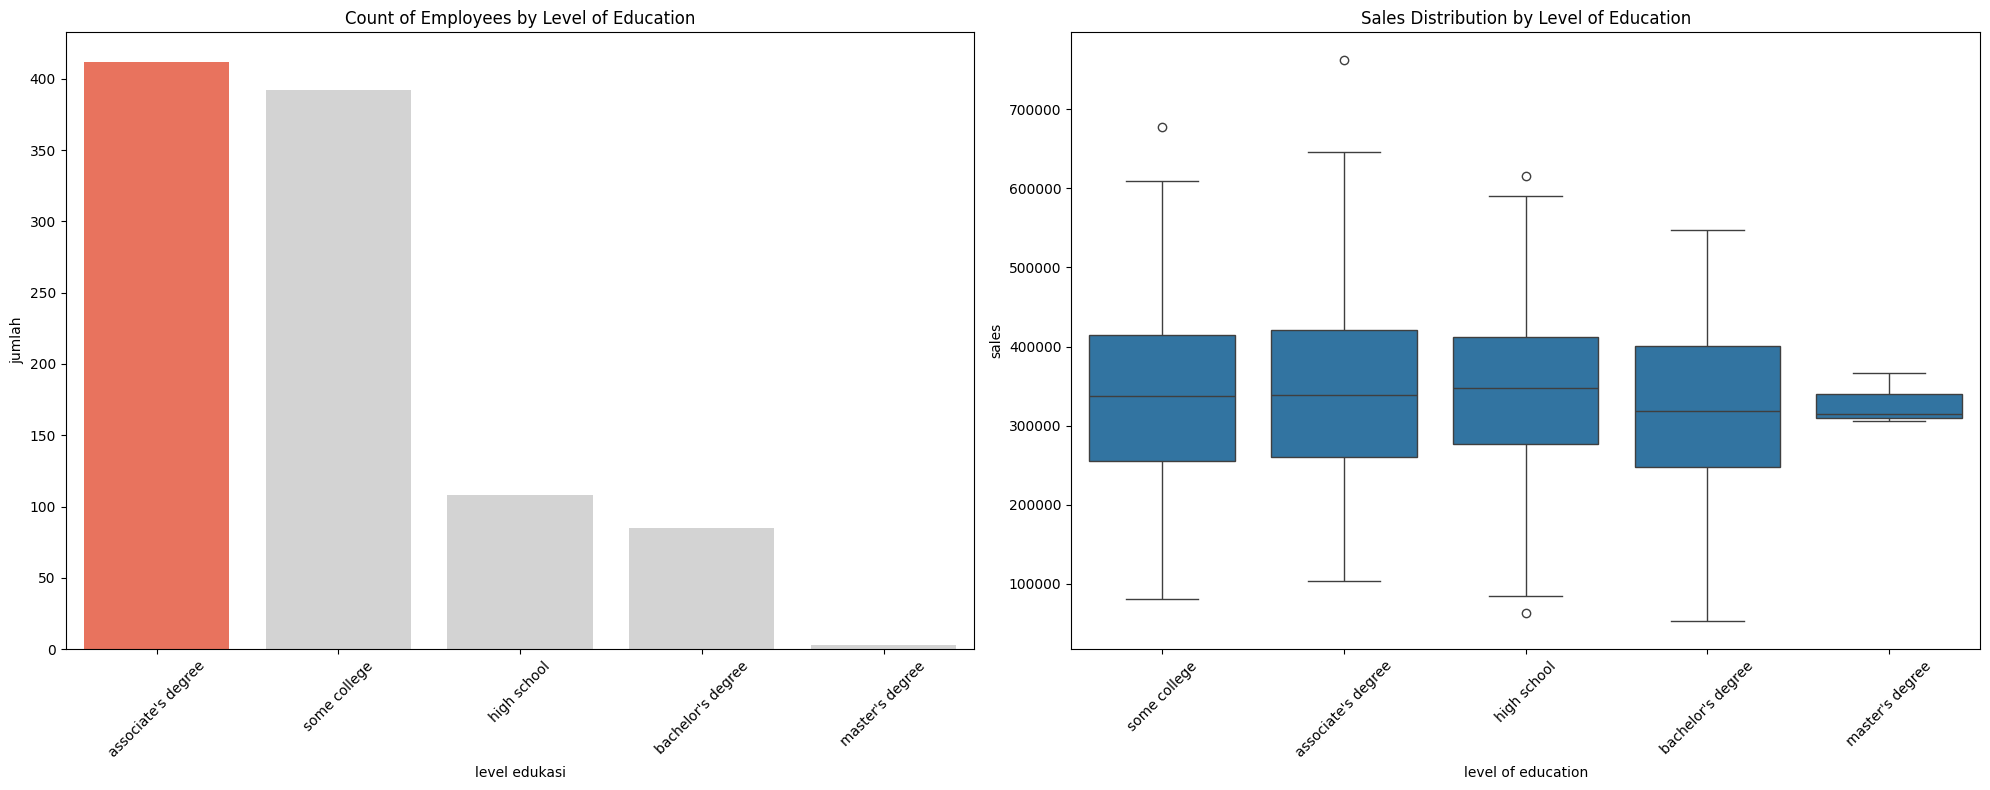

In [198]:
# Combine barplot with custom style and boxplot using subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Barplot of level of education counts
# Using the same logic as the previous barplotX to apply custom colors
color = ['tomato' if k == df_education['level edukasi'][0] else 'lightgray' for k in df_education['level edukasi'].unique().tolist()]
sns.barplot(
    data=df_education,
    x='level edukasi',
    y='jumlah',
    hue='level edukasi',
    palette=color,
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Count of Employees by Level of Education')
axes[0].tick_params(axis='x', rotation=45)


# Boxplot of sales by level of education
sns.boxplot(x='level of education', y='sales', data=df, ax=axes[1])
axes[1].set_title('Sales Distribution by Level of Education')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()